In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('insurance.csv')

## 1. Top Five Rows of Dataset.

In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Check Last 5 Rows of The Dataset

In [5]:

data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(1338, 7)

In [7]:
print('Number of rows :', data.shape[0])
print('Number of columns :', data.shape[1])

Number of rows : 1338
Number of columns : 7


## 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 5. Check Null Values In The Dataset

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 6. Get Overall Statistics About The Dataset

In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 7. Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [11]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

# female - 0, male - 1

In [13]:
print(data['smoker'].unique())
print(data['region'].unique())

['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
data['smoker'] = data['smoker'].map({'yes': 0, 'no': 1})
data['region'] = data['region'].map({'southwest': 1,'southeast':2, 'northwest':3, 'northeast': 4})

In [15]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,0,31.920,0,1,4,2205.98080
1335,18,0,36.850,0,1,2,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


## 8. Store Feature Matrix In X and Response(Target) In Vector y

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## 9. Train/Test split
          1. Split data into two-part: a training set and a testing set
          2. Train the model(s) on the training set
          3. Test the Model(s) on the Testing set

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [48]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

## 10. Import the models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 11. Model Training

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## 12. Prediction on Test Data

In [51]:
y_pred_1 = lr.predict(X_test)
y_pred_2 = svm.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'lr':y_pred_1, 'svm':y_pred_2, 
                    'rf': y_pred_3, 'gr': y_pred_4})

df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.095432,10641.705933,11001.128629
887,5272.17580,7116.295018,9492.005195,4993.899829,5840.174656
890,29330.98315,36909.013521,9649.076063,28291.115434,28001.980112
1293,9301.89355,9507.874691,9554.920417,10253.959761,9745.291602
259,33750.29180,27013.350008,9419.697424,34594.135176,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9649.235457,47642.661515,45431.423211
575,12222.89830,11814.555568,9625.696314,12963.972168,12465.025294
535,6067.12675,7638.107736,9503.727718,6429.767223,6974.336525
543,63770.42801,40959.081722,9605.106753,46780.274029,47862.047791


## 13. Compare Performance Visually 

In [52]:
import matplotlib.pyplot as plt

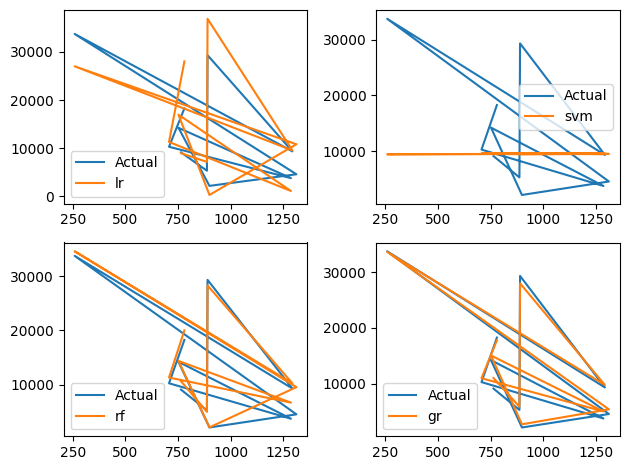

In [53]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['rf'].iloc[0:11], label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['gr'].iloc[0:11], label='gr')

plt.tight_layout()
plt.legend()

## 14. Evaluating the Algorithm

In [54]:
from sklearn import metrics

In [55]:
score_1 = metrics.r2_score(y_test, y_pred_1)
score_2 = metrics.r2_score(y_test, y_pred_2) # greater - better
score_3 = metrics.r2_score(y_test, y_pred_3)
score_4 = metrics.r2_score(y_test, y_pred_4)

In [56]:
print(score_1, score_2, score_3, score_4)

0.7833463107364539 -0.07229022268882468 0.8674292838559929 0.8779726251291786


In [60]:
s_1 = metrics.mean_absolute_error(y_test, y_pred_1)
s_2 = metrics.mean_absolute_error(y_test, y_pred_2) # lower - better
s_3 = metrics.mean_absolute_error(y_test,y_pred_3)
s_4 = metrics.mean_absolute_error(y_test, y_pred_4)

In [61]:
print(s_1, s_2, s_3, s_4)

4186.508898366434 8592.173599203325 2461.115863400374 2447.951558054584


## 15. Predict Charges for New Customer

In [64]:
data = {'age' : 40, 'sex' :1, 'bmi':40.30, 'children': 4, 'smoker': 1, 'region':2}

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [65]:
gr.predict(df)

array([8614.96267251])

## 16. Save Model Usign Joblib

In [66]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [67]:
import joblib

In [68]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [69]:
model = joblib.load('model_joblib_gr')
model.predict(df)

array([8151.36208691])

## 17. GUI

In [70]:
from tkinter import *

In [76]:

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master, text = 'Insurance Cost = ').grid(row=8)
    Label(master, text = result[0]).grid(row=8)



master = Tk()

master.title("Insurance cost prediction")
label = Label(master, text='Insurance Cost Prediction', 
              bg='black', fg='white').grid(row=1, columnspan=2)

Label(master, text = 'Enter your age').grid(row=2)
Label(master, text = 'Male or Female [1/0]').grid(row=3)
Label(master, text = 'Enter your BMI').grid(row=4)
Label(master, text = 'Enter number of children').grid(row=5)
Label(master, text = 'Smoker Yes/No [1/0]').grid(row=6)
Label(master, text = 'Region [1-4]').grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=2, column=1)
e2.grid(row=3, column=1)
e3.grid(row=4, column=1)
e4.grid(row=5, column=1)
e5.grid(row=6, column=1)
e6.grid(row=7, column=1)

Button(master, text='Predict', command=show_entry).grid()

mainloop()

C:\Users\Malik Computers\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
